# How are In-demand Skills trending for Data Analysts?

Methodology

1. Aggregate skills count monthly
2. Re-analyse base on percentage of total jobs
3. Plot the monthly skill demand

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [4]:
df_DA_UK['job_posted_month_number'] = df_DA_UK['job_posted_date'].dt.month

In [5]:
df_DA_UK_explode = df_DA_UK.explode('job_skills')

In [6]:
df_DA_UK_pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_number', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()
df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')
df_DA_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,1,0,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,0,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,0,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,0,0,0,0,0,1,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,0
9,211,167,130,99,87,58,24,24,15,11,...,0,0,1,0,0,0,1,0,0,0


In [7]:
DA_totals = df_DA_UK.groupby('job_posted_month_number').size()

In [8]:
df_DA_UK_pivot.div(DA_totals, axis=0)

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,0.491329,0.435453,0.302505,0.183044,0.175337,0.096339,0.142582,0.050096,0.028902,0.061657,...,0.000000,0.000000,0.00000,0.001927,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
2,0.512676,0.456338,0.259155,0.171831,0.160563,0.104225,0.107042,0.078873,0.039437,0.045070,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
3,0.502110,0.443038,0.299578,0.198312,0.210970,0.130802,0.059072,0.054852,0.075949,0.046414,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
4,0.480000,0.445714,0.262857,0.228571,0.160000,0.097143,0.137143,0.051429,0.062857,0.040000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
5,0.564356,0.415842,0.292079,0.148515,0.143564,0.089109,0.039604,0.079208,0.059406,0.044554,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
6,0.474419,0.441860,0.367442,0.167442,0.172093,0.079070,0.037209,0.088372,0.055814,0.079070,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
7,0.517787,0.446640,0.383399,0.205534,0.166008,0.114625,0.134387,0.122530,0.055336,0.071146,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.003953,0.00000,0.00000,0.00000,0.00000
8,0.514151,0.367925,0.301887,0.183962,0.183962,0.075472,0.047170,0.080189,0.061321,0.033019,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
9,0.571816,0.452575,0.352304,0.268293,0.235772,0.157182,0.065041,0.065041,0.040650,0.029810,...,0.000000,0.000000,0.00271,0.000000,0.000000,0.000000,0.00271,0.00000,0.00000,0.00000


In [9]:
df_DA_UK_percent = df_DA_UK_pivot.div(DA_totals/100, axis=0)

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.395257,0.000000,0.000000,0.000000,0.000000
8,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000


In [10]:
# Change month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_number')
df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.395257,0.000000,0.000000,0.000000,0.000000
Aug,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000


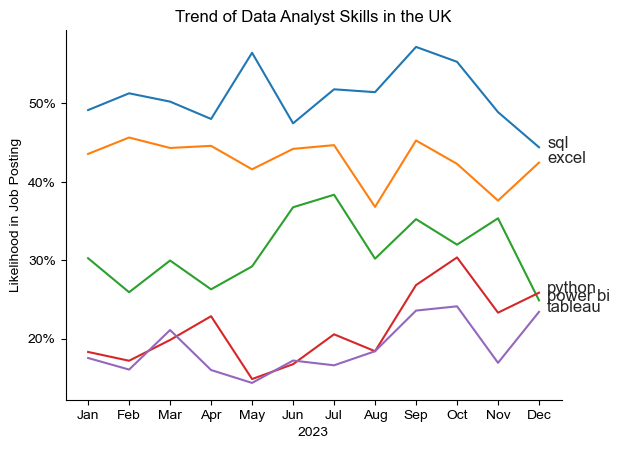

In [11]:
df_plot = df_DA_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trend of Data Analyst Skills in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel(2023)
plt.legend().remove()

# include % on the Y axis
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()